# Статистика, DS-поток
## Задание SP.6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  70 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  200 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

Почему все задачи высокой степени? Просто остальные убрали :)

In [1]:
# Bot check

# HW_ID: ds_sp6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(font_scale=1.2, palette='Set2')

______________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [3]:
wine = pd.read_csv('wine.data', header=None)
columns_names = {
    0: 'class',
    1: 'Alcohol',
    2: 'Malic acid',
    3: 'Ash',
    4: 'Alcalinity of ash',
    5: 'Magnesium',
    6: 'Total phenols',
    7: 'Flavanoids',
    8: 'Nonflavanoid phenols',
    9: 'Proanthocyanins',
    10: 'Color intensity',
    11: 'Hue',
    12: '0D280/0D315 of diluted wines',
    13: 'Proline'
}
wine.rename(columns=columns_names, inplace=True)
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** Из домашнего задания ST5:

$$\hat a = \overline X$$

$$\hat \Sigma = \frac{1}{n}\sum_{i=1}^n(X_i - \overline X)(X_i - \overline X)^T$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

<Figure size 2500x2500 with 0 Axes>

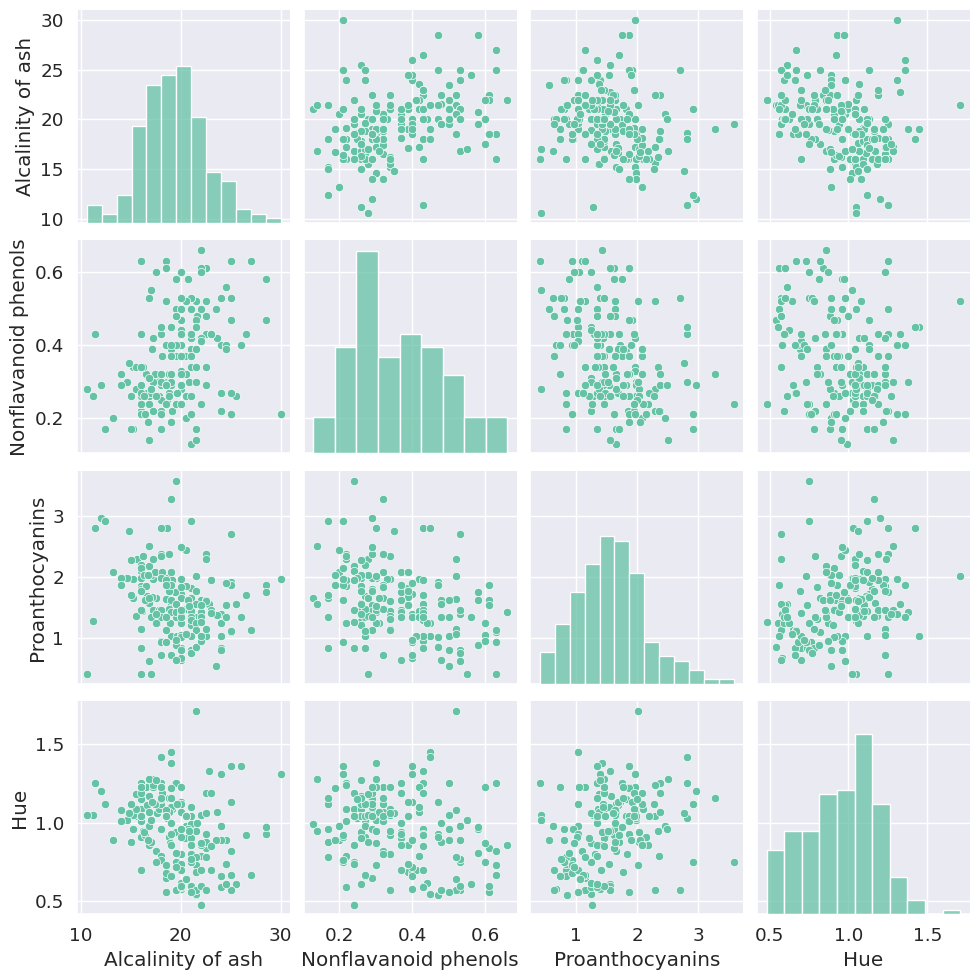

In [4]:
columns = ['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']

plt.figure(figsize=(25, 25))
sns.pairplot(wine[columns])

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [5]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''
    
    return np.mean(sample, axis=0)

In [6]:
def mle_for_covariance_matrix(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    '''
    
    mean = mle_for_mean(sample)
    n = sample.shape[0]
    matrix = 1/n * ((sample - mean).T @ (sample - mean))
    return matrix

In [7]:
sample = wine[columns].to_numpy()

a = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)
a, sigma

(array([19.49494382,  0.36185393,  1.59089888,  0.95744944]),
 array([[ 1.10900306e+01,  1.49576790e-01, -3.75057253e-01,
         -2.07943233e-01],
        [ 1.49576790e-01,  1.54016191e-02, -2.59134642e-02,
         -7.42920401e-03],
        [-3.75057253e-01, -2.59134642e-02,  3.25754248e-01,
          3.84473488e-02],
        [-2.07943233e-01, -7.42920401e-03,  3.84473488e-02,
          5.19514497e-02]]))

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

*Указание.* Используйте функции `plt.pcolormesh` и `plt.clabel`

Вспомогательная функция

In [8]:
def plot_density(ax, x, y, mean, cov):
    """Рисует точки, плотность и линии уровня."""
    ax.scatter(x, y, alpha=0.6, edgecolors='k')

    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    density = sps.multivariate_normal.pdf(grid, mean=mean, cov=cov)
    density = density.reshape(xx.shape)
    
    cmap = plt.get_cmap('viridis')
    mesh = ax.pcolormesh(xx, yy, density, shading='auto', cmap=cmap, alpha=0.3)
    fig.colorbar(mesh, ax=ax, shrink=0.8)

    cset = ax.contour(xx, yy, density, levels=10, colors='black', linewidths=0.5)
    ax.clabel(cset, inline=True, fontsize=8)


И само построение графиков

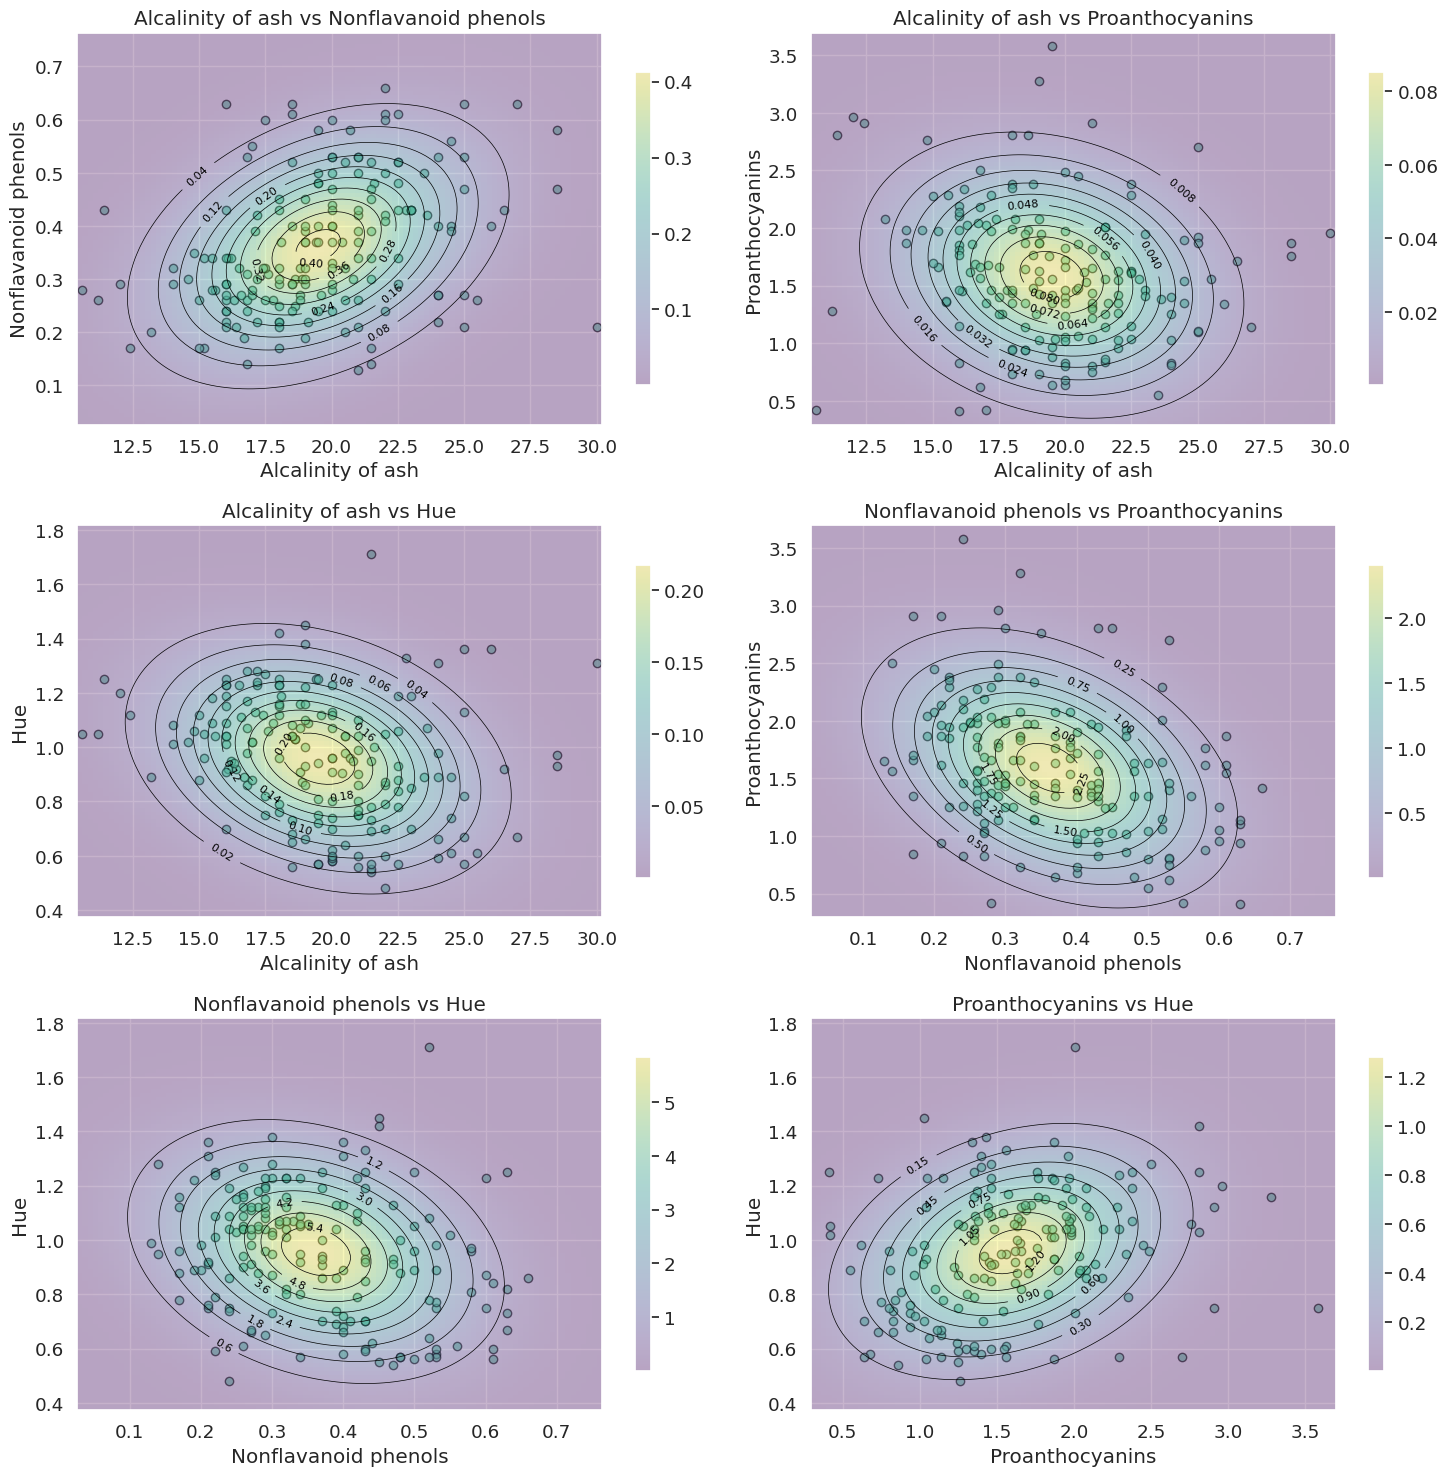

In [9]:
mean_estimate = mle_for_mean(sample)
covariance_estimate = mle_for_covariance_matrix(sample)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

idx = 0
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        ax = axes[idx]
        idx += 1
        x, y = sample[:, i], sample[:, j]
        mean_ij = mean_estimate[[i, j]]
        cov_ij = covariance_estimate[np.ix_([i, j], [i, j])]
        
        plot_density(ax, x, y, mean_ij, cov_ij)
        ax.set_xlabel(columns[i])
        ax.set_ylabel(columns[j])
        ax.set_title(f'{columns[i]} vs {columns[j]}')

plt.tight_layout()
plt.show()

**Вывод:** 

Как видно, полученные распределеня хорошо согласовываются с оценками: точки расположены в линияъ уровня пропорционально их плотностям. Таким образом, можно довольно широкий класс совместных распределений рассматривать как многомерное нормальное распределение.

__________________
### Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [10]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [11]:
diabetes.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** 

Медиана это 50%-квантиль, а среднее - mean

Сравнивая построчно, можно увидеть, что значение Insulin сильно отличаются, откуда можно сделать вывод о наличие выбросов Insulin в сильно положительные значения

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

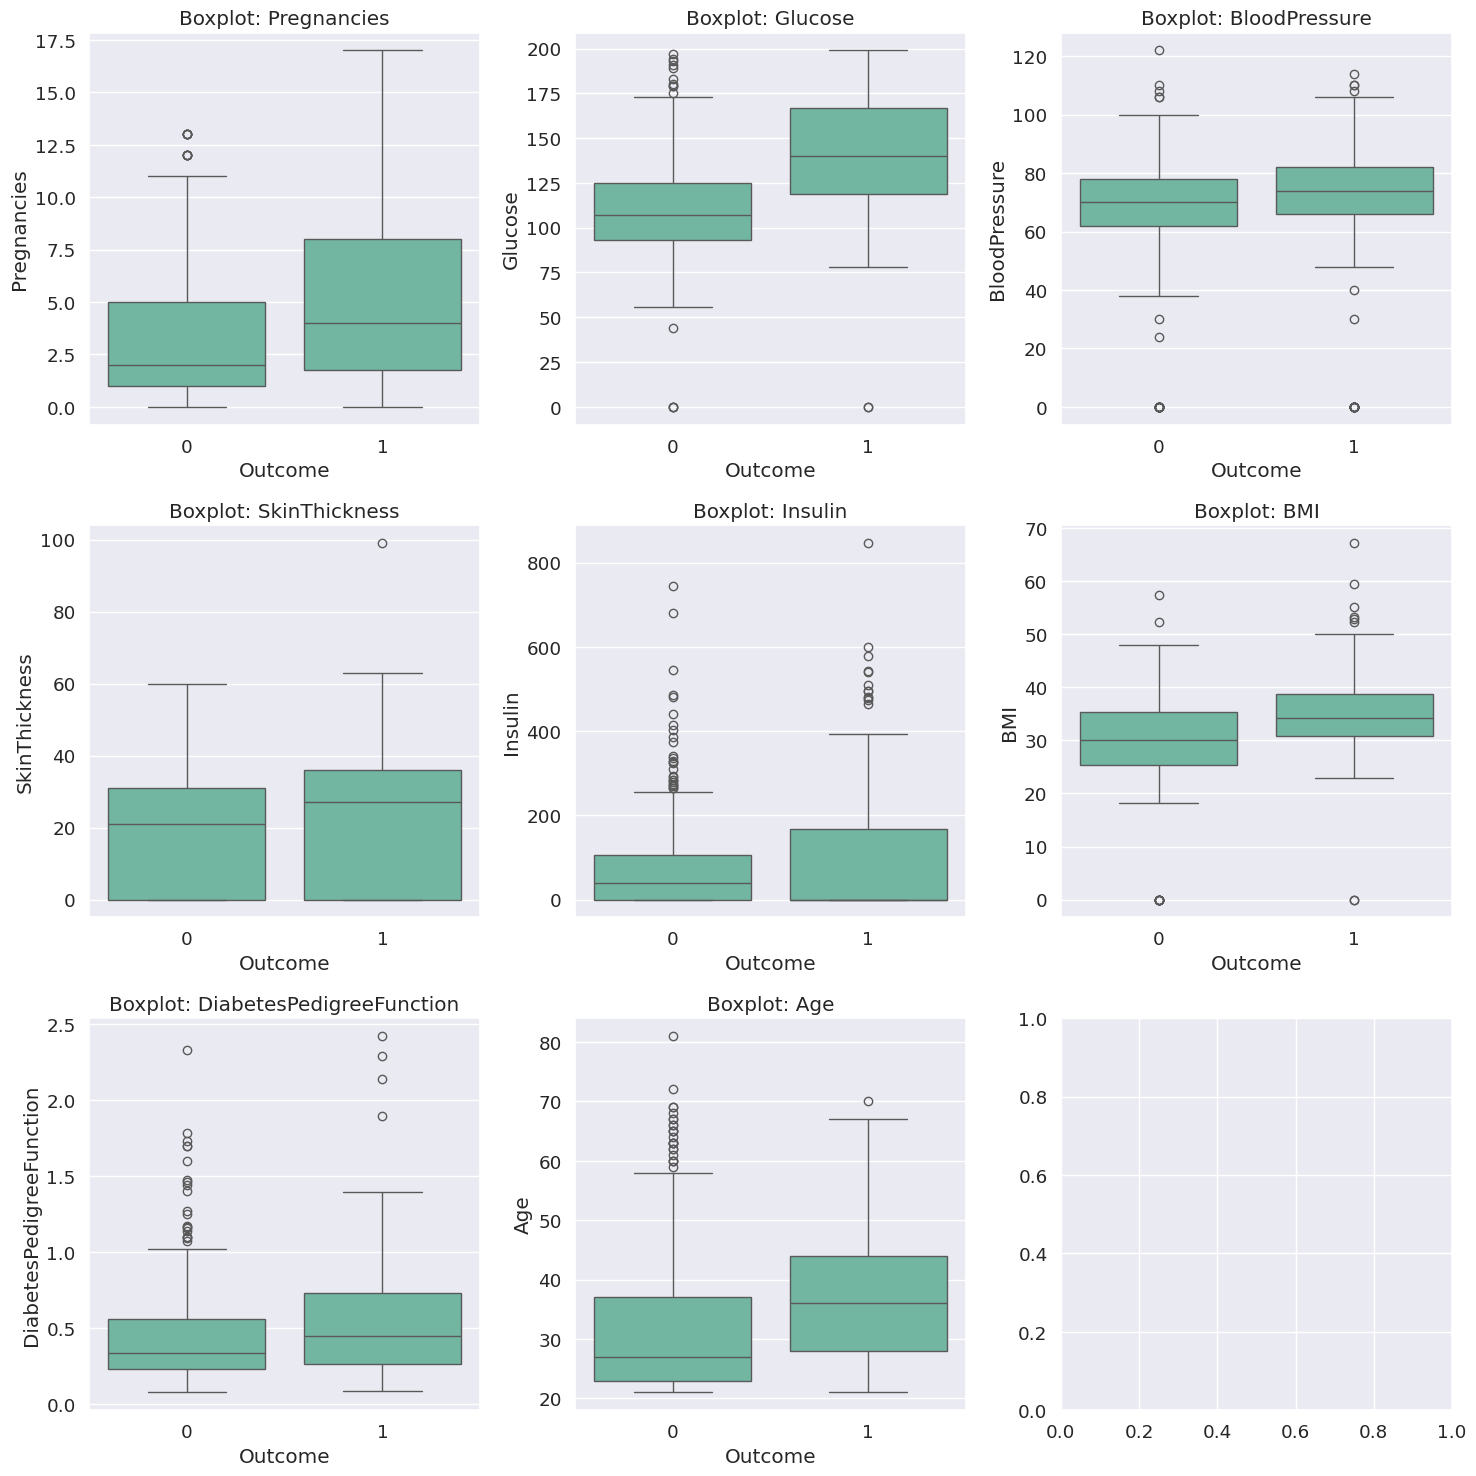

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for idx, column in enumerate(diabetes.columns[:-1]):
    sns.boxplot(data=diabetes, x='Outcome', y=column, ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {column}')

plt.tight_layout()
plt.show()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** 

boxplot устроен так:

1) Линия внутри зеленой коробочки - это медиана
2) Границы коробочки - это $u_1 = 25\%$ и $u_2 = 55\%$ - квантили
3) Межквартильный размах определяется как $I = u_2 - u_1$, тогда нижняя и верхняя граница усов это отступ на $1.5 I$ от границ коробочки
4) Все обрезается на минимуме/максимуме 
5) Точки вне усов - потенциальные выбросы

Выбросы есть в Glucose (+Outcome = 0), Insuline, DiabetesPedigreeFunction (+Outcome = 0), BMI, BloodPressure, Age (+Outcome = 0)

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

Подсчет числа выбросов

In [13]:
def count_outliers(df, feature, outcome_value):
    """Подсчитывает количество выбросов
    для одного признака в одной группе Outcome"""
    data = df[df['Outcome'] == outcome_value][feature]
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    I = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * I
    upper_bound = Q3 + 1.5 * I
    
    outliers_minus = data[data < lower_bound]
    outliers_plus = data[data > upper_bound]
    
    return len(outliers_minus), len(outliers_plus)

Итого:

In [14]:
features = [col for col in diabetes.columns if col != 'Outcome']

result = {'Feature': [], 'Total_Outliers': [], 'Outliers_Minus': [], 'Outliers_Plus': []}

for feature in features:
    outliers_0_minus, outliers_0_plus = count_outliers(diabetes, feature, outcome_value=0)
    outliers_1_minus, outliers_1_plus = count_outliers(diabetes, feature, outcome_value=1)
    
    total_outliers = outliers_0_minus + outliers_1_minus + outliers_0_plus + outliers_1_plus
    
    result['Feature'].append(feature)
    result['Total_Outliers'].append(total_outliers)
    result['Outliers_Minus'].append(outliers_0_minus + outliers_1_minus)
    result['Outliers_Plus'].append(outliers_0_plus + outliers_1_plus)

outliers_df = pd.DataFrame(result)
print(outliers_df)

                    Feature  Total_Outliers  Outliers_Minus  Outliers_Plus
0               Pregnancies              10               0             10
1                   Glucose              16               6             10
2             BloodPressure              48              39              9
3             SkinThickness               1               0              1
4                   Insulin              38               0             38
5                       BMI              19              11              8
6  DiabetesPedigreeFunction              24               0             24
7                       Age              25               0             25


Для фичи с самым большим числом выбросов (BloodPressure):

In [15]:
data = diabetes['BloodPressure'].to_numpy()
mean_value = np.mean(data)
median_value = np.median(data)

walsh_averages = (data[:, None] + data[None, :]) / 2
walsh_median = np.median(walsh_averages[np.triu_indices_from(walsh_averages)])

print(f'Выборочное среднее: {mean_value}')
print(f'Выборочная медиана: {median_value}')
print(f'Медиана средних Уолша: {walsh_median}')


Выборочное среднее: 69.10546875
Выборочная медиана: 72.0
Медиана средних Уолша: 71.0


Для фичи, где медиана и среднее сильно различаются:

In [16]:
data = diabetes['Insulin'].to_numpy()
mean_value = np.mean(data)
median_value = np.median(data)

walsh_averages = (data[:, None] + data[None, :]) / 2
walsh_median = np.median(walsh_averages[np.triu_indices_from(walsh_averages)])

print(f'Выборочное среднее: {mean_value}')
print(f'Выборочная медиана: {median_value}')
print(f'Медиана средних Уолша: {walsh_median}')


Выборочное среднее: 79.79947916666667
Выборочная медиана: 30.5
Медиана средних Уолша: 62.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** 

1) Как видно, хоть и больше всего выбросов в BloodPressure, но там статистики отличаются не так сильно, как в Insuline

    В BloodPressure выбросы не так сильно отличаются от медианы, поэтому при усреднении они не дают столь значимого эффекта, как в Insuline.

    В Insuline есть много значений, которые в разы отличаются от медианного (значения 300 против медианного 30)

    За счет этого, различия в статистиках в основном в Insuline, а не в BloodPressure

2) Медиана устойчивее к выбросам, чем медиана средних Уолша, за счет этого разница иммено такая. Поэтому в таких случаях выборочная медиана может быть предпочтительным показателем, поскольку она лучше отражает "центральное" значение данных, не подверженное влиянию выбросов. 

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:**

Робастые статистики позволяют в том числе:
1) Исследовать разброс данных (например схемой boxplot, которая кроме того дает мощный инструмет визуального анализа характера данных) - можно узнать о наличии ассиметрии в данных, о ее направленности (напр. выбросы всегда завышают значение/занижают и на сколько), о том, насколько таких выбросов много - и, конечно, сделать предположение о возможном выбросе
2) Узнать несмещенную из-за выбросов информацию о выборке

То есть они работают в рельном мире, когда не всегда можно сделать предположения о независимости случайных величин, либо об отсутствии выбросов - и эти предположения, конечно, являются идеализацией, сильно упрощающей анализ. Поэтому нужно адаптировать свои подходы к данным, учитывая их структуру и характеристики, для достижения более надежных и точных результатов.


______________
### Задача 3.

> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

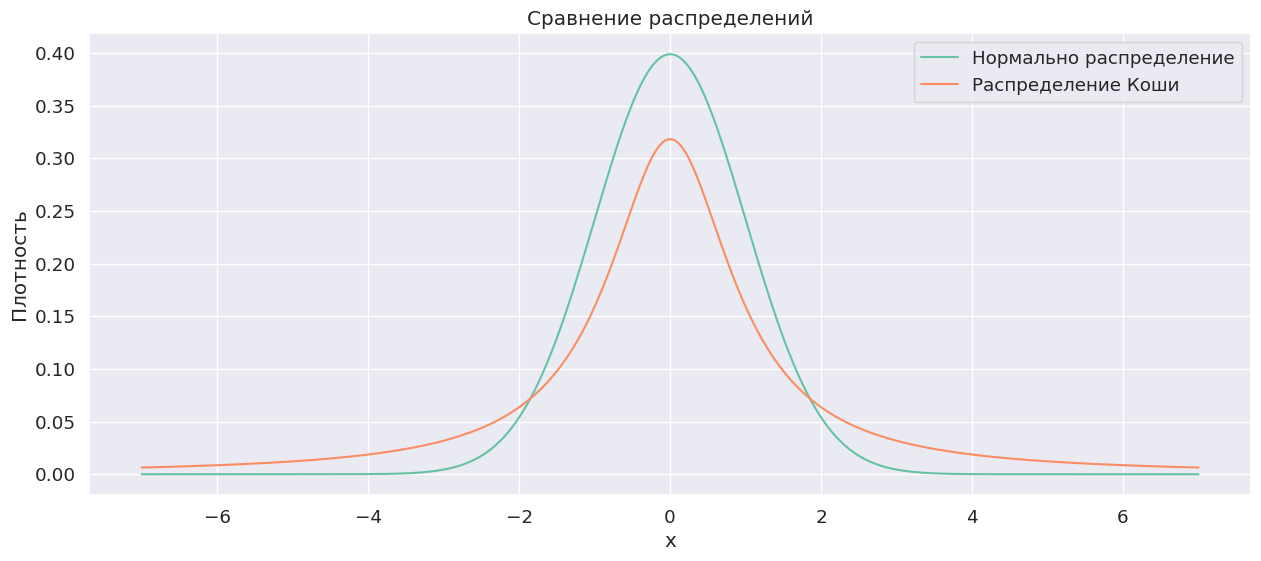

In [17]:
x = np.linspace(-7, 7, 500)

plt.figure(figsize=(15, 6))
plt.plot(x, sps.norm.pdf(x), label='Нормально распределение')
plt.plot(x, sps.cauchy.pdf(x), label='Распределение Коши')

plt.title('Сравнение распределений')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

plt.show()

**Вывод:** 

У распределения Коши тяжелый хвост, в отличие от нормального распределения. 

Например, у него нет матожидания или дисперсии

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

По теореме:

$$\sigma_\alpha^2 = \frac{2}{(1-2 \alpha)^2} \left( \int_0^{u_{1-\alpha}} x^2 p_0(x) dx + \alpha u_{1-\alpha}^2 \right)$$
Где $\left( p_0(x) = \frac{1}{\pi(1+x^2)}\right)$

Простой заменой на арктангенс берем интеграл, откуда

$$\sigma_\alpha^2 = \frac{2}{(1-2 \alpha)^2} \left( \frac{u_{1-\alpha} - \tan^{-1}(u_{1-\alpha})}{\pi} + \alpha u_{1-\alpha}^2  \right)$$

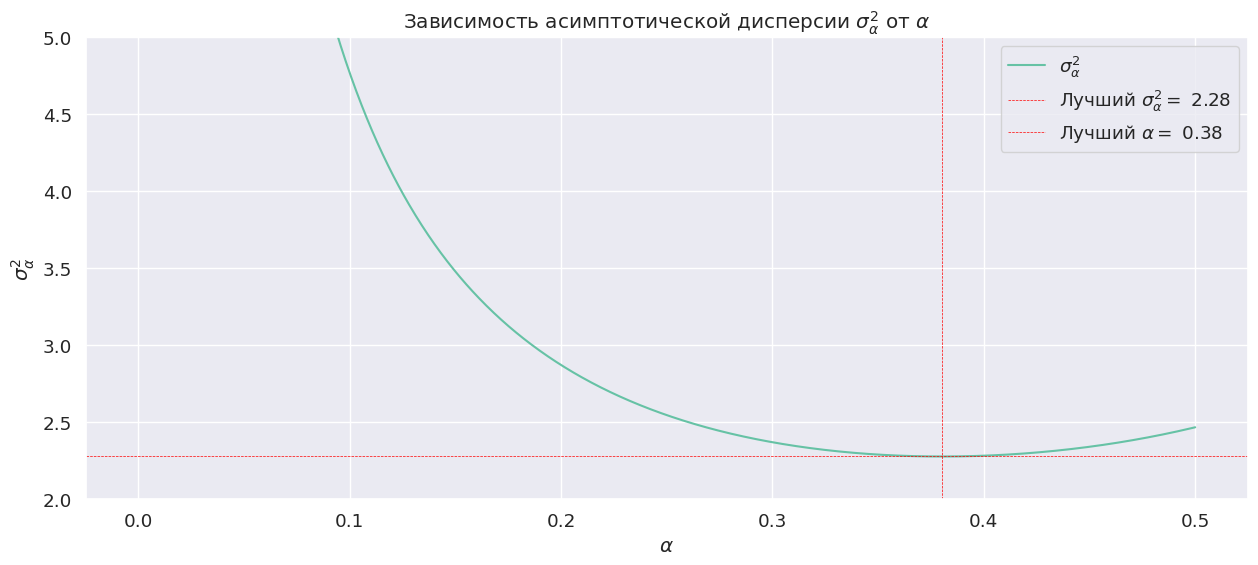

In [18]:
alpha = np.linspace(0.0001, 0.49999, 1000)

#u_1_alpha = np.tan(np.pi / 2 * (1 - alpha))
u = sps.cauchy.ppf(1 - alpha)

integral = (u - np.arctan(u)) / np.pi

sigma_alpha_squared = (2 / (1 - 2 * alpha)**2) * (integral + alpha * u ** 2)

min_sigma_squared = np.min(sigma_alpha_squared)
alpha_best = alpha[np.argmin(sigma_alpha_squared)]

plt.figure(figsize=(15, 6))
plt.plot(alpha, sigma_alpha_squared, label=r'$\sigma_{\alpha}^2$')
plt.axhline(min_sigma_squared, color='red', linewidth=0.5, linestyle='--',
           label=rf'Лучший $\sigma_\alpha^2 =$ {min_sigma_squared:.2f}')
plt.axvline(alpha_best, color='red', linewidth=0.5, linestyle='--', 
           label=rf'Лучший $\alpha =$ {alpha_best:.2f}')
plt.title(r'Зависимость асимптотической дисперсии $\sigma_{\alpha}^2$ от $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma_{\alpha}^2$')
plt.ylim(2, 5)

plt.grid(True)
plt.legend(loc='upper right')

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ и вывод:** 

Минимальная ассимптотическая дисперсия $\sigma_\alpha^2 \approx 2.28$ при $\alpha \approx 0.38$

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя
    * выборочную медиану;
    * усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;
    * выборочную медиану;
    * медиану средних Уолша;
    * любую асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

1) В модели $\mathcal{N}(\theta, 1)$ лучший точный ДИ - ДИ при известной дисперсии. С лекции он равен:
   $$ \left( \overline X \pm \frac{\sigma}{\sqrt n} z_{(1+\alpha) / 2} \right)$$

2) АДИ для выборочной медианы, по теореме с лекции имеет ассимптотическую дисперсию:
   $$\frac{1}{4p^2(0)} = \frac{1}{4(1/ \pi)^2} = \frac{\pi^2}{4}$$

3) АДИ для лучшего усеченного среднего согласно прошлой задачи $\alpha = 0.38$, $\sigma_\alpha^2 = 2.28$

4) АДИ медианы средних Уолша имеет ассимптотическую дисперсию (по теореме с лекции):
   $$\frac{1}{12} \frac{1}{\int_{\mathbb R}p_0(x)^2 dx}^2 = \frac{\pi^2}{3}$$
   так как
   $$\int_{\mathbb R} p_0(x)^2 dx^2 = \frac{1}{\pi^2} \int_{\mathbb R} \frac{1}{(1+x^2)^2}dx = \frac{1}{2 \pi}$$

5) С лекции, методом Ньютона мы получили лучшую оценку с ассимптотической дисперсией $\sigma^2 = 2$, сама оценка равна:

$$\hat \theta = \hat \mu + \left(\sum_{i=1}^n \frac{X_i - \hat \mu}{1 + (X_i - \hat \mu)^2} \right)  \bigg/ \left(\sum_{i=1}^n \frac{1 - (X_i - \hat \mu)^2}{ (1 + (X_i - \hat \mu)^2)^2} \right)$$

Функция для построения интервалов

In [19]:
def draw_confidence_interval_no_sample(
    left, right, estimation=None, ylim=(0, 6),
    color_interval='#00CC66', color_estimation='#FF3300', label=None, alpha=0.25
):
    '''
    Рисует доверительный интервал и оценки параметра.

    :param left: левые границы интервалов
    :param right: правые границы интервалов
    :param estimation: оценки параметра
    :param ylim: ограничение вертикальной оси
    :param color_interval: цвет интервала
    :param color_estimation: цвет оценок
    :param label: подпись для интервала
    :param alpha: прозрачность заливки интервала
    '''
    n = len(left)
    plt.fill_between(range(1, n+1), left, right,
                     color=color_interval, alpha=alpha, label=label)
    
    if estimation is not None:
        plt.plot(range(1, n+1), estimation, alpha = 2 * alpha,
                 color=color_estimation, linewidth=2)
    
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка параметра')
    plt.grid(True)
    plt.legend()

Ассимптотически эффективная оценка (последняя)

In [20]:
def newton_estimate(sample, axis=-1):
    median = np.median(sample, axis=-1, keepdims=True)
    numerator = np.sum((sample - median) / (1 + (sample - median)**2), axis=-1)
    denominator = np.sum(1 - (sample - median)**2 / (1 + (sample - median)**2)**2, axis=-1)
    median = np.squeeze(median, axis=axis)
    return median + numerator / denominator

Предпосчет данных

In [21]:
n = 200
sample = np.random.standard_cauchy(size=n)
alpha = 0.95
z_alpha = sps.norm.ppf((1 + alpha) / 2)

# 1. Нормальная модель
sigma_normal_squared = 1
mean = np.cumsum(sample) / n
left_normal = mean - z_alpha * np.sqrt(sigma_normal_squared) / np.sqrt(np.arange(1, n+1))
right_normal = mean + z_alpha * np.sqrt(sigma_normal_squared) / np.sqrt(np.arange(1, n+1))

# 2. Выборочная медиана
median = [np.median(sample[:i + 1]) for i in range(len(sample))]
sigma_median_squared = np.pi**2 / 4
half_width_median = z_alpha * sigma_median_squared / np.sqrt(np.arange(1, n+1))
left_median = median - half_width_median
right_median = median + half_width_median

# 3. Доверительный интервал для усеченного среднего 
alpha_truncated = 0.38
sigma_truncated_squared = 2.28
half_width_truncated = z_alpha * np.sqrt(sigma_truncated_squared) / np.sqrt(np.arange(1, n+1))
truncaded_median = np.array([sps.trim_mean(sample[:i + 1],
                                         proportiontocut=alpha_truncated)
                           for i in range(n)])
left_truncated = truncaded_median - half_width_truncated
right_truncated = truncaded_median + half_width_truncated

# 4. Доверительный интервал для медианы средних Уолша
sigma_walsh_squared = np.pi**2 / 3
walsh_averages = (sample[:, None] + sample[None, :]) / 2
walsh_median = np.array([np.median(walsh_averages[:i + 1, :i + 1][np.triu_indices(i + 1)])
                          for i in range(n)])
left_walsh = walsh_median - np.sqrt(sigma_walsh_squared) * z_alpha / np.sqrt(np.arange(1, n + 1))
right_walsh = walsh_median + np.sqrt(sigma_walsh_squared) * z_alpha / np.sqrt(np.arange(1, n + 1))

# 5. theta
newton_est = np.zeros(n)
for i in range(n):
    newton_est[i] = newton_estimate(sample[:i + 1])

left_newton = newton_est - z_alpha * np.sqrt(2) / np.sqrt(np.arange(1, n + 1))
right_newton = newton_est + z_alpha * np.sqrt(2) / np.sqrt(np.arange(1, n + 1))

Итого:

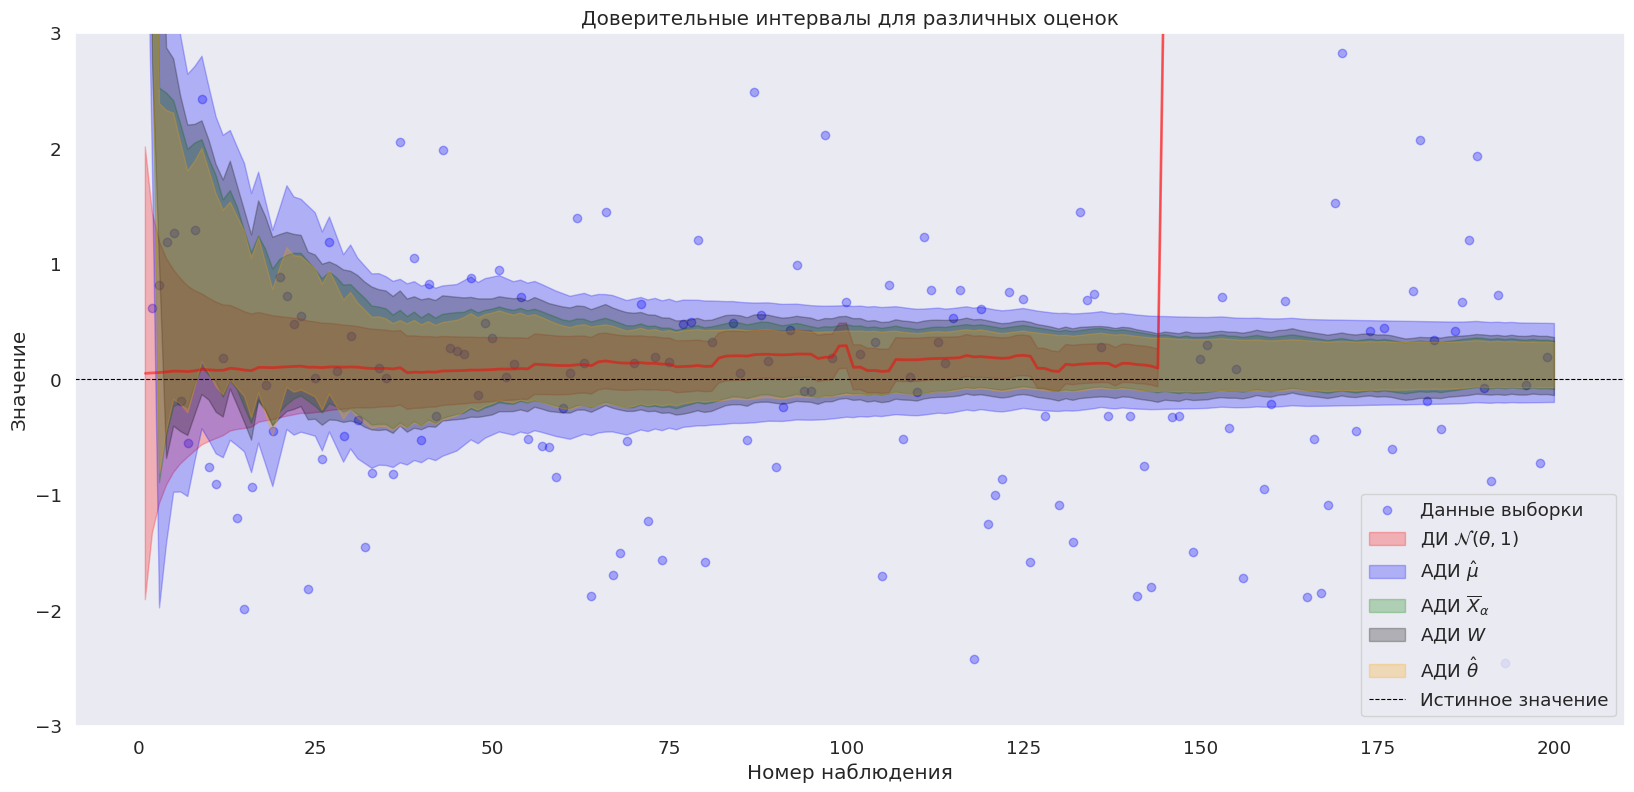

In [22]:
plt.figure(figsize=(20, 9))
plt.scatter(range(1, n + 1), sample, alpha=0.3,
            label='Данные выборки', color='blue')

draw_confidence_interval_no_sample(
    left=left_normal,
    right=right_normal, 
    estimation=mean, 
    label=r'ДИ $\mathcal{N}(\theta, 1)$', 
    color_interval='red',
    color_estimation='red'
)

draw_confidence_interval_no_sample(
    left=left_median, 
    right=right_median,
    #estimation=median, 
    label=r'АДИ $\hat \mu$', 
    color_interval='blue',
    color_estimation='blue'
)

draw_confidence_interval_no_sample(
    left=left_truncated, 
    right=right_truncated, 
    #estimation=truncaded_median, 
    label=r'АДИ $\overline{X}_\alpha$', 
    color_interval='green',
    color_estimation='green'
)

draw_confidence_interval_no_sample(
    left=left_walsh, 
    right=right_walsh, 
    #estimation=walsh_median, 
    label=r'АДИ $W$', 
    color_interval='black',
    color_estimation='black'
)

draw_confidence_interval_no_sample(
    left=left_newton, 
    right=right_newton, 
    #estimation=newton_est, 
    label=r'АДИ $\hat \theta$', 
    color_interval='orange',
    color_estimation='orange'
)

plt.title('Доверительные интервалы для различных оценок')
plt.axhline(y=0, color='k', linestyle='--',
            linewidth=0.8, label='Истинное значение')
plt.ylim(-3, 3)
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()


**Вывод:** 

1) Оценка через модель $\mathcal{N} (\theta, 1)$ самая плохая - она скачет и не сходится (что логично - из за тяжелого хвоста распределения Коши матожидания не существует, и в выборке появляются большие значения - из за которого происходит скачек среднего выборочного (как в одной из домашек по введению в АД))
2) Остальные оценки сглаживают эти выбросы за счет использования робастых статистик в том или ином виде. Сильного различия между длиной интервала не видно

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

Функции для построения интервалов

In [27]:
def get_normal_confint(sample, sigma_squared=1,
                       alpha=0.95, axis=-1):
    '''
    Доверительный интервал для нормальной модели.

    :param sample: Массив выборок
    :type sample: numpy.array
    :return: (left, right) - Левые и правые границы интервалов
    '''
    n = sample.shape[axis]
    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    mean = np.mean(sample, axis=axis)

    half_width = z_alpha * np.sqrt(sigma_squared) / np.sqrt(n)
    left = mean - half_width
    right = mean + half_width

    return left, right

def get_median_confint(sample, sigma_squared=np.pi**2 / 4,
                       alpha=0.95, axis=-1):
    '''
    Доверительный интервал для выборочной медианы.

    :param sample: Массив выборок
    :type sample: numpy.array
    :return: (left, right) - Левые и правые границы интервалов
    '''
    n = sample.shape[axis]
    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    median = np.median(sample, axis=-1)

    half_width = z_alpha * np.sqrt(sigma_squared) / np.sqrt(n)
    left = median - half_width
    right = median + half_width

    return left, right

def get_truncated_confint(sample, alpha_trim=0.38, sigma_squared=2.28,
                          alpha=0.95, axis=-1):
    '''
    Доверительный интервал для усеченного среднего.

    :param sample: Массив выборок
    :type sample: numpy.array
    :return: (left, right) - Левые и правые границы интервалов
    '''
    n = sample.shape[axis]
    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    truncated_mean = sps.trim_mean(sample, proportiontocut=alpha_trim, axis=axis)

    half_width = z_alpha * np.sqrt(sigma_squared) / np.sqrt(n)
    left = truncated_mean - half_width
    right = truncated_mean + half_width

    return left, right

def get_walsh_confint(sample, sigma_squared=np.pi**2 / 3, alpha=0.95,
                      axis=-1):
    '''
    Доверительный интервал для медианы средних Уолша.

    :param sample: Массив выборок
    :type sample: numpy.array
    :return: (left, right) - Левые и правые границы интервалов
    '''
    n = sample.shape[axis]
    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    reshaped_sample = np.moveaxis(sample, axis, 0) 
    walsh_averages = (reshaped_sample[:, None, :] + reshaped_sample[None, :, :]) / 2

    triu_indices = np.triu_indices(n)
    walsh_median = np.median(walsh_averages[triu_indices], axis=0)

    half_width = z_alpha * np.sqrt(sigma_squared) / np.sqrt(n)
    left = walsh_median - half_width
    right = walsh_median + half_width

    return left, right

def get_newton_confint(sample, alpha=0.95, axis=-1, sigma_squared=2):
    '''
    Доверительный интервал на основе оценки Ньютона.

    :param sample: Массив выборок
    :type sample: numpy.array
    :return: (left, right) - Левые и правые границы интервалов
    '''
    n = sample.shape[axis]
    z_alpha = sps.norm.ppf((1 + alpha) / 2)

    newton_est = newton_estimate(sample, axis=axis)

    half_width = z_alpha * np.sqrt(sigma_squared) / np.sqrt(n)
    left = newton_est - half_width
    right = newton_est + half_width

    return left, right

Функции для экспериментов из третьей домашки:

In [28]:
def get_coverage_rate(ci_builder, sample, theta_space, alpha=0.95):
    '''
    Вычисляет долю покрытия параметра доверительным интервалом 

    :param ci_builder: Функция, по выборке строящая доверительные интервалы,
    должна возвращать пару массивов: левые и правые границы доверительных 
    интервалов
    :type ci_builder: numpy.array -> (numpy.array, numpy.array)

    :param sample: Выборка, для которой будут построены доверительные интервалы 
    :type sample: numpy.array 

    :param theta_space: Сетка из значений параметра равномерного распределения
    :type theta_space: numpy.array

    :param alpha: Уровень доверия для построения ДИ 
    :type alpha: float 
    '''
    left, right = ci_builder(sample, alpha=alpha, axis=-1)
    return np.mean(
        (left <= theta_space.reshape(-1, 1)) & (theta_space.reshape(-1, 1) <= right),
        axis=-1,
    )

def get_coverage_length(ci_builder, sample, theta_space, alpha=0.95):
    '''
    Вычисляет среднюю длину доверительного интервала

    :param ci_builder: Функция, по выборке строящая доверительные интервалы,
    должна возвращать пару массивов: левые и правые границы доверительных 
    интервалов
    :type ci_builder: numpy.array -> (numpy.array, numpy.array)

    :param sample: Выборка, для которой будут построены доверительные интервалы 
    :type sample: numpy.array 

    :param theta_space: Сетка из значений параметра равномерного распределения
    :type theta_space: numpy.array

    :param alpha: Уровень доверия для построения ДИ 
    :type alpha: float 
    '''
    left, right = ci_builder(sample, alpha=alpha, axis=-1)
    return np.mean(right - left)


Функции запуска эксперимента:

In [29]:
def run_few_experiments(
        sample_size=100, 
        num_exps=1000, 
        theta_gran=100, 
        methods=None,
        alpha=0.95,
        fixed=False):
    '''
    Запускает небольшое количество экспериментов по определнию доли покрытия параметра
    доверительными интервалами из methods 

    :param sample_size: Размер выборки
    :param num_exps: Число экспериментов 
    :param theta_gran: Размер сетки параметра 
    :param methods: Список функций для построения ДИ
    :param alpha: Уровень доверия
    :param fixed: Зафиксирован ли в 0 параметр theta
    '''
    if not fixed:
        theta_space = np.linspace(0, 1, theta_gran)
    else:
        theta_space = np.array([0])    
    
    samples = sps.cauchy(
        loc=theta_space.reshape(-1, 1, 1)  # Сдвиг (медиана) для каждого θ
    ).rvs(
        size=(len(theta_space), num_exps, sample_size)  # Размер выборки
    )

    coverage_rates = np.array([
        get_coverage_rate(method, samples, theta_space, alpha)
        for method in methods])
    coverage_lengthes = np.array([
        get_coverage_length(method, samples, theta_space, alpha)
        for method in methods])

    return {
        'coverage_rates': coverage_rates,
        'coverage_lengthes': coverage_lengthes
    }


def run_many_experiments(
        sample_size=100, 
        num_exps=1_000_000,
        small_num_exps=1_000, 
        theta_gran=100, 
        methods=None,
        alpha=0.95,
        fixed=False):
    '''
    Запускает большое количество экспериментов по определнию доли покрытия параметра
    доверительными интервалами из methods путем многократного запуска run_few_experiments

    :param sample_size: Размер выборки
    :param num_exps: Число экспериментов всего 
    :param small_num_exps: Число экспериментов в каждом запуске run_few_experiments 
    :param theta_gran: Размер сетки параметра 
    :param methods: Список функций для построения ДИ
    :param alpha: Уровень доверия
    :param fixed: Зафиксирован ли в 0 параметр theta
    '''
    results = None
    launches = num_exps // small_num_exps
    for _ in tqdm(range(launches)):
        current_result = run_few_experiments(sample_size,
                                             small_num_exps,
                                             theta_gran,
                                             methods,
                                             alpha,
                                             fixed)

        if results is None:
            results = current_result
        else:
            results['coverage_rates'] += current_result['coverage_rates']
            results['coverage_lengthes'] += current_result['coverage_lengthes']

    results['coverage_rates'] /= launches
    results['coverage_lengthes'] /= launches
    return results

Во-первых, дополнительно посмотрим как доля покрытия истинного значения параметра $\theta$ зависит от самого параметра $\theta$:

Запуск эксперимента

In [30]:
THETA_GRAN = 100  # Размер сетки параметра
NUM_EXPS = 1_000  # Число экспериментов всего
NUM_SMALL_EXPS = 100  # Число экспериментов в одном запуске
SAMPLE_SIZE = 50  # Размер выборки 
ALPHA = 0.95  # Уровень доверия
METHODS = [get_normal_confint, get_median_confint,
           get_truncated_confint, get_walsh_confint,
           get_newton_confint]  # Методы построения ДИ
NAMES = [r'ДИ $\mathcal{N}(\theta, 1)$',
         r'АДИ $\hat \mu$',
         r'АДИ $\overline{X}_\alpha$',
         r'АДИ $W$',
         r'АДИ $\hat \theta$'
        ]  # Названия методов 

results = run_many_experiments(SAMPLE_SIZE, NUM_EXPS,
                               NUM_SMALL_EXPS, THETA_GRAN, METHODS, ALPHA)

100%|███████████████████████████████████████████| 10/10 [00:30<00:00,  3.06s/it]


Функция для отрисовки графиков

In [31]:
def plot_results(results, names):
    '''
    Функция для отрисовки графиков
    '''
    _, ax = plt.subplots(figsize=(20, 11), nrows=1, ncols=1)
    for name, result in zip(names, results):
        theta_space = np.linspace(0, 1, THETA_GRAN)
        ax.plot(theta_space, result, label=name, lw=2)

    ax.hlines(0.95, 0, 1, color='gray', alpha=0.3, lw=5)
    ax.legend()
    ax.set_ylabel("Доля покрытия")
    ax.set_xlabel(r"Параметр $\theta$")
    ax.set_title("Доля покрытия параметра, Размер выборки: {}".format(SAMPLE_SIZE))

Итого:

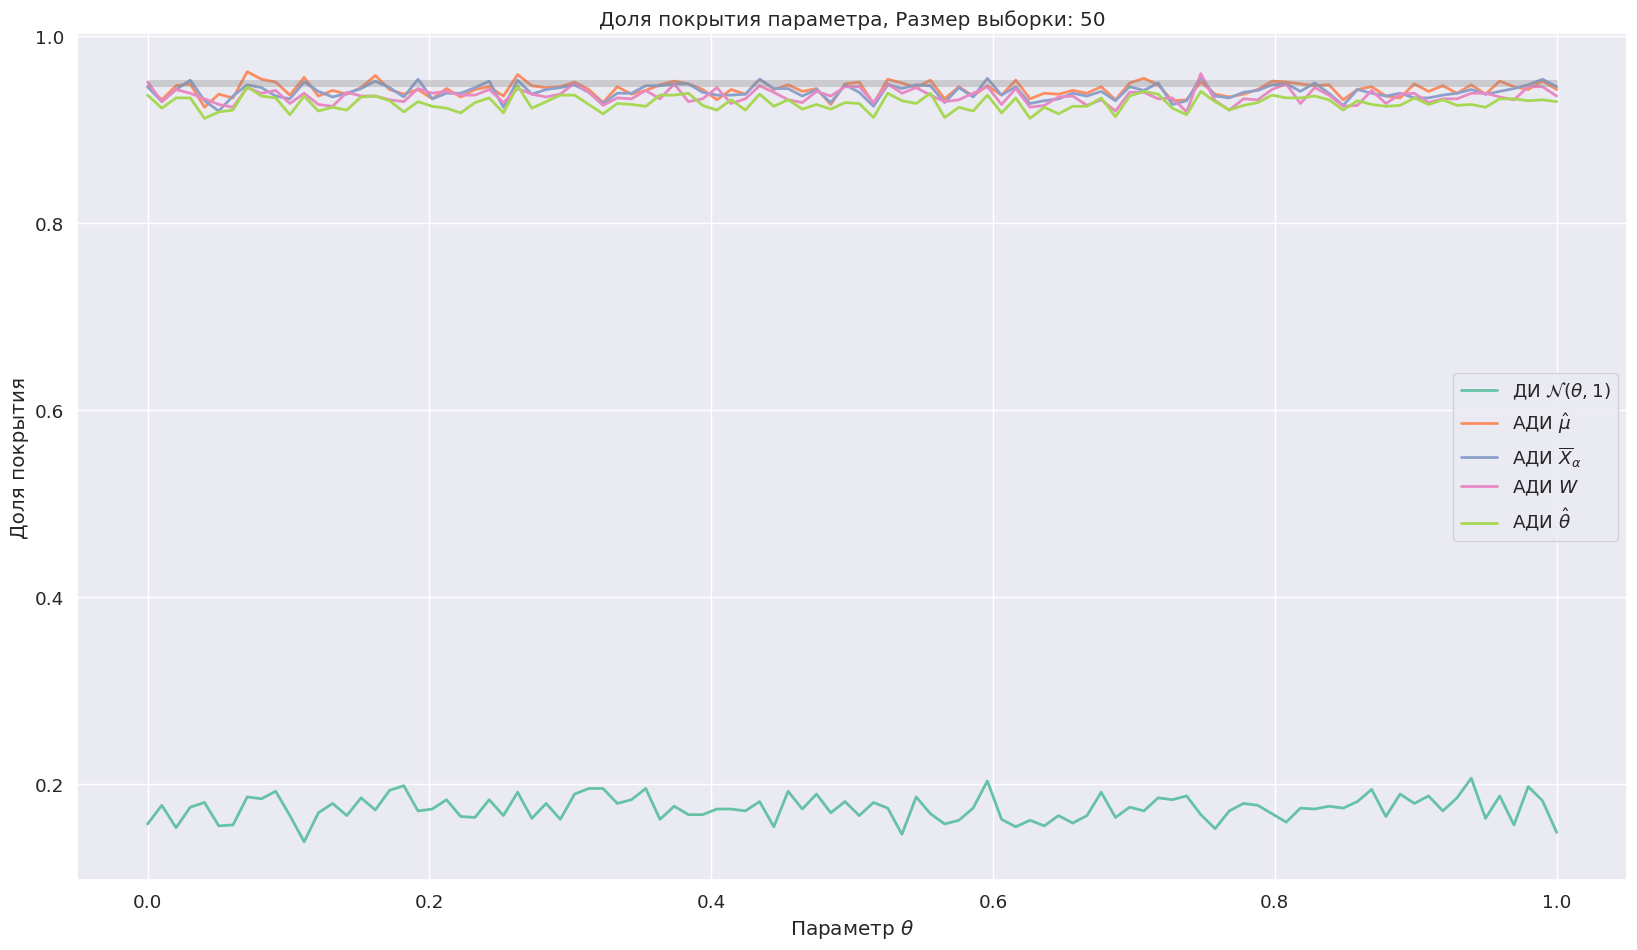

In [32]:
plot_results(results['coverage_rates'], NAMES)

Теперь построим зависимости от размера выборки (зафиксируем $\theta = 0$)

In [33]:
from IPython.display import clear_output

THETA_GRAN = 1  # Размер сетки параметра
NUM_EXPS = 1000  # Число экспериментов всего
NUM_SMALL_EXPS = 100  # Число экспериментов в одном запуске
ALPHA = 0.95  # Уровень доверия
FIXED = True

# Методы построения ДИ
METHODS = [get_normal_confint, get_median_confint,
           get_truncated_confint, get_walsh_confint,
           get_newton_confint]  
NAMES = [r'ДИ $\mathcal{N}(\theta, 1)$',
         r'АДИ $\hat \mu$',
         r'АДИ $\overline{X}_\alpha$',
         r'АДИ $W$',
         r'АДИ $\hat \theta$'
        ]

sample_sizes = np.arange(1, 201)
coverage_rates = np.zeros((len(METHODS), len(sample_sizes)))
coverage_lengths = np.zeros((len(METHODS), len(sample_sizes)))


for i, SAMPLE_SIZE in enumerate(sample_sizes):
    clear_output()
    results = run_many_experiments(SAMPLE_SIZE, NUM_EXPS, 
                                   NUM_SMALL_EXPS, THETA_GRAN, METHODS, ALPHA, FIXED)

    for j, method in enumerate(METHODS):
        coverage_rates[j, i] = results['coverage_rates'][j]
        coverage_lengths[j, i] = results['coverage_lengthes'][j]

clear_output()

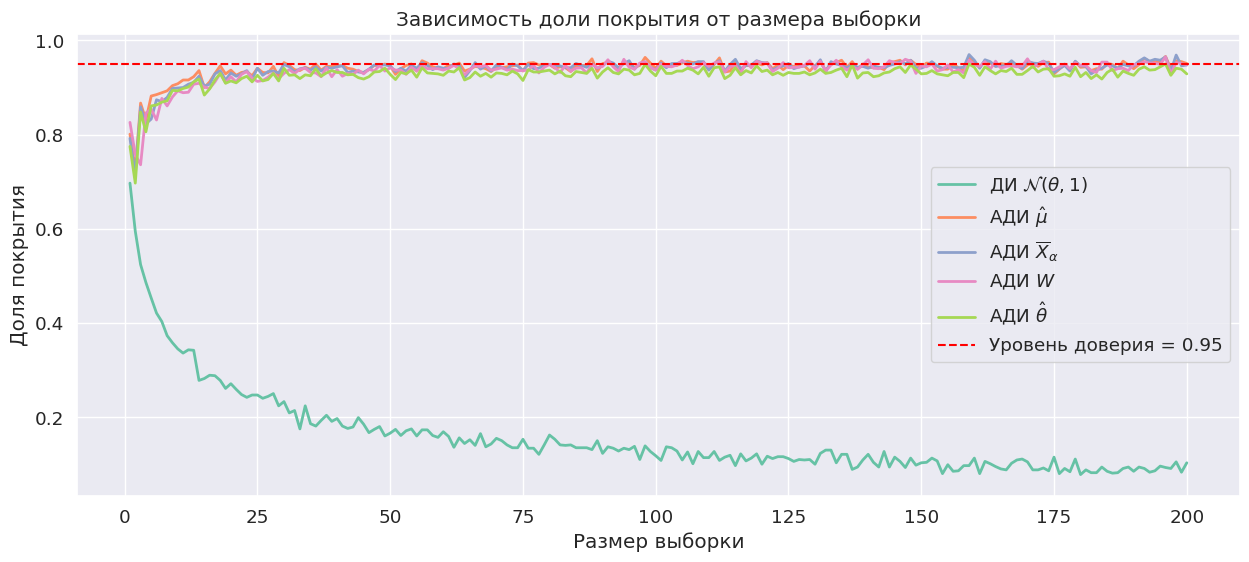

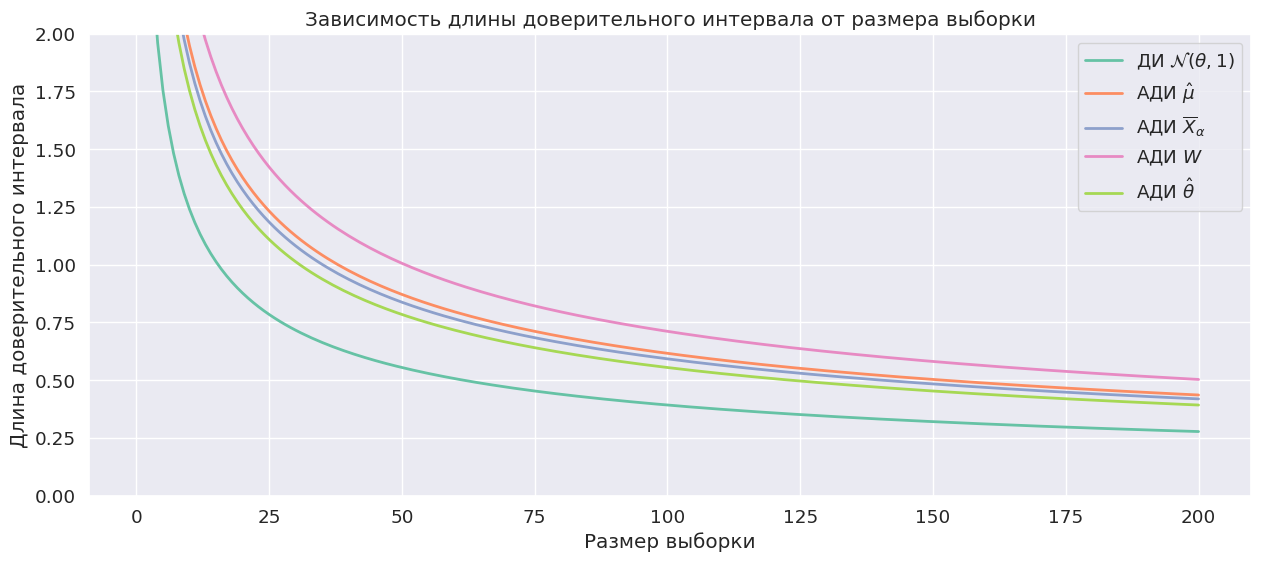

In [34]:
plt.figure(figsize=(15, 6))
for j in range(len(METHODS)):
    plt.plot(sample_sizes, coverage_rates[j], linewidth=2, label=NAMES[j])
plt.title('Зависимость доли покрытия от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Доля покрытия')
plt.axhline(y=ALPHA, color='r', linestyle='--', label=f'Уровень доверия = {ALPHA}')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 6))
for j in range(len(METHODS)):
    plt.plot(sample_sizes, coverage_lengths[j], linewidth=2, label=NAMES[j])
plt.title('Зависимость длины доверительного интервала от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Длина доверительного интервала')
plt.legend()
plt.ylim((0, 2))
plt.grid(True)
plt.show()

**Вывод:** 

1) От самого параметра $\theta$ доли покрытия не зависят - что логично, потому что это просто параллельный сдвиг всей выборки (все считаем корректно)
2) Доля покрытия растет с ростом размера выборок для корректных АДИ, а для модели $\mathcal N(\theta, 1)$ - уменьшается. Это тоже согласуется с предыдущим  пунктом. При этом все оценки АДИ достаточно точные при выборке размера порядка 25, а длины доверительных интервалов примерно одинаковые, чуть выигрывает $\hat \theta$ - наилучшая ассимптотическая оценка, как и следовало ожидать.
3) С ростом размера выборки уменьшается длина ДИ - что тоже логично, ведь там идет множитель $\frac{1}{\sqrt n}$ - и с ростом информации о распределении мы должны давать более точную оценку